In [163]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from datasist.structdata import detect_outliers
from ip2geotools.databases.noncommercial import DbIpCity as ip2geo
from geopy.distance import great_circle
from geopy.geocoders import Nominatim
import plotly.graph_objs as go 
import plotly.express as px
import plotly.figure_factory as ff
import plotly.offline as py
import re
import random 
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from collections import Counter
from nltk import ngrams
from nltk import word_tokenize
%matplotlib inline
sns.set(rc={'figure.figsize':[8,5]},font_scale=1.2)
pd.set_option('display.max_columns',35) # to appear all columns

In [2]:
df = pd.read_csv(r'C:\Users\alaa_\final\Hotel_Reviews.csv')

# First Step should Data Exploration


In [3]:
df.head(2)

,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,days_since_review,lat,lng
0,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Russia,I am so angry that i made this post available...,397,1403,Only the park outside of the hotel was beauti...,11,7,2.9,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968
1,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Ireland,No Negative,0,1403,No real complaints the hotel was great great ...,105,7,7.5,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968


In [4]:
df.columns

Index(['Hotel_Address', 'Additional_Number_of_Scoring', 'Review_Date',
       'Average_Score', 'Hotel_Name', 'Reviewer_Nationality',
       'Negative_Review', 'Review_Total_Negative_Word_Counts',
       'Total_Number_of_Reviews', 'Positive_Review',
       'Review_Total_Positive_Word_Counts',
       'Total_Number_of_Reviews_Reviewer_Has_Given', 'Reviewer_Score', 'Tags',
       'days_since_review', 'lat', 'lng'],
      dtype='object')

In [5]:
df.shape

(515738, 17)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515738 entries, 0 to 515737
Data columns (total 17 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   Hotel_Address                               515738 non-null  object 
 1   Additional_Number_of_Scoring                515738 non-null  int64  
 2   Review_Date                                 515738 non-null  object 
 3   Average_Score                               515738 non-null  float64
 4   Hotel_Name                                  515738 non-null  object 
 5   Reviewer_Nationality                        515738 non-null  object 
 6   Negative_Review                             515738 non-null  object 
 7   Review_Total_Negative_Word_Counts           515738 non-null  int64  
 8   Total_Number_of_Reviews                     515738 non-null  int64  
 9   Positive_Review                             515738 non-null  object 
 

In [7]:
df.isnull().sum()

Hotel_Address                                    0
Additional_Number_of_Scoring                     0
Review_Date                                      0
Average_Score                                    0
Hotel_Name                                       0
Reviewer_Nationality                             0
Negative_Review                                  0
Review_Total_Negative_Word_Counts                0
Total_Number_of_Reviews                          0
Positive_Review                                  0
Review_Total_Positive_Word_Counts                0
Total_Number_of_Reviews_Reviewer_Has_Given       0
Reviewer_Score                                   0
Tags                                             0
days_since_review                                0
lat                                           3268
lng                                           3268
dtype: int64

In [8]:
df.duplicated().sum()

526

In [9]:
df.head(1)

,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,days_since_review,lat,lng
0,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Russia,I am so angry that i made this post available...,397,1403,Only the park outside of the hotel was beauti...,11,7,2.9,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968


In [10]:
df.describe()

,Additional_Number_of_Scoring,Average_Score,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,lat,lng
count,515738.000000,515738.000000,515738.000000,515738.000000,515738.000000,515738.000000,515738.000000,512470.000000,512470.000000
mean,498.081836,8.397487,18.539450,2743.743944,17.776458,7.166001,8.395077,49.442439,2.823803
std,500.538467,0.548048,29.690831,2317.464868,21.804185,11.040228,1.637856,3.466325,4.579425
min,1.000000,5.200000,0.000000,43.000000,0.000000,1.000000,2.500000,41.328376,-0.369758
25%,169.000000,8.100000,2.000000,1161.000000,5.000000,1.000000,7.500000,48.214662,-0.143372
50%,341.000000,8.400000,9.000000,2134.000000,11.000000,3.000000,8.800000,51.499981,0.010607
75%,660.000000,8.800000,23.000000,3613.000000,22.000000,8.000000,9.600000,51.516288,4.834443
max,2682.000000,9.800000,408.000000,16670.000000,395.000000,355.000000,10.000000,52.400181,16.429233


In [11]:
df.describe(include = "object")

,Hotel_Address,Review_Date,Hotel_Name,Reviewer_Nationality,Negative_Review,Positive_Review,Tags,days_since_review
count,515738,515738,515738,515738,515738,515738,515738,515738
unique,1493,731,1492,227,330011,412601,55242,731
top,163 Marsh Wall Docklands Tower Hamlets London ...,8/2/2017,Britannia International Hotel Canary Wharf,United Kingdom,No Negative,No Positive,"[' Leisure trip ', ' Couple ', ' Double Room '...",1 days
freq,4789,2585,4789,245246,127890,35946,5101,2585


# Distribution Of Numeric Columns


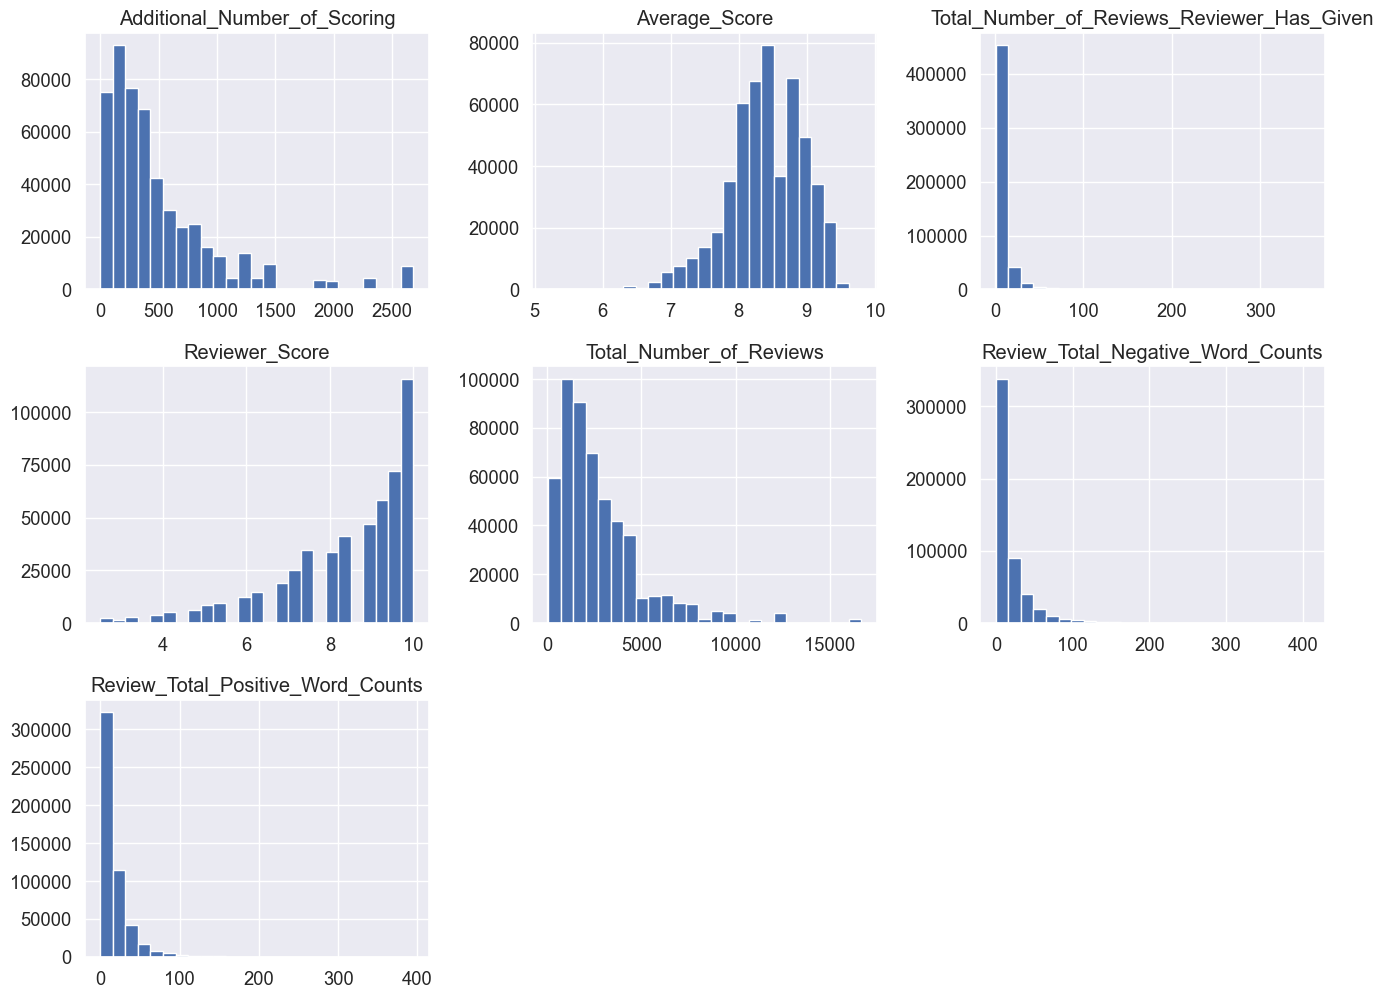

In [12]:
df[['Additional_Number_of_Scoring','Average_Score',
    'Total_Number_of_Reviews_Reviewer_Has_Given','Reviewer_Score','Total_Number_of_Reviews','Review_Total_Negative_Word_Counts','Review_Total_Positive_Word_Counts']].hist(bins=25,figsize=(16,12))
plt.show()


# To Know Out_liers and Max and Min Data from plots


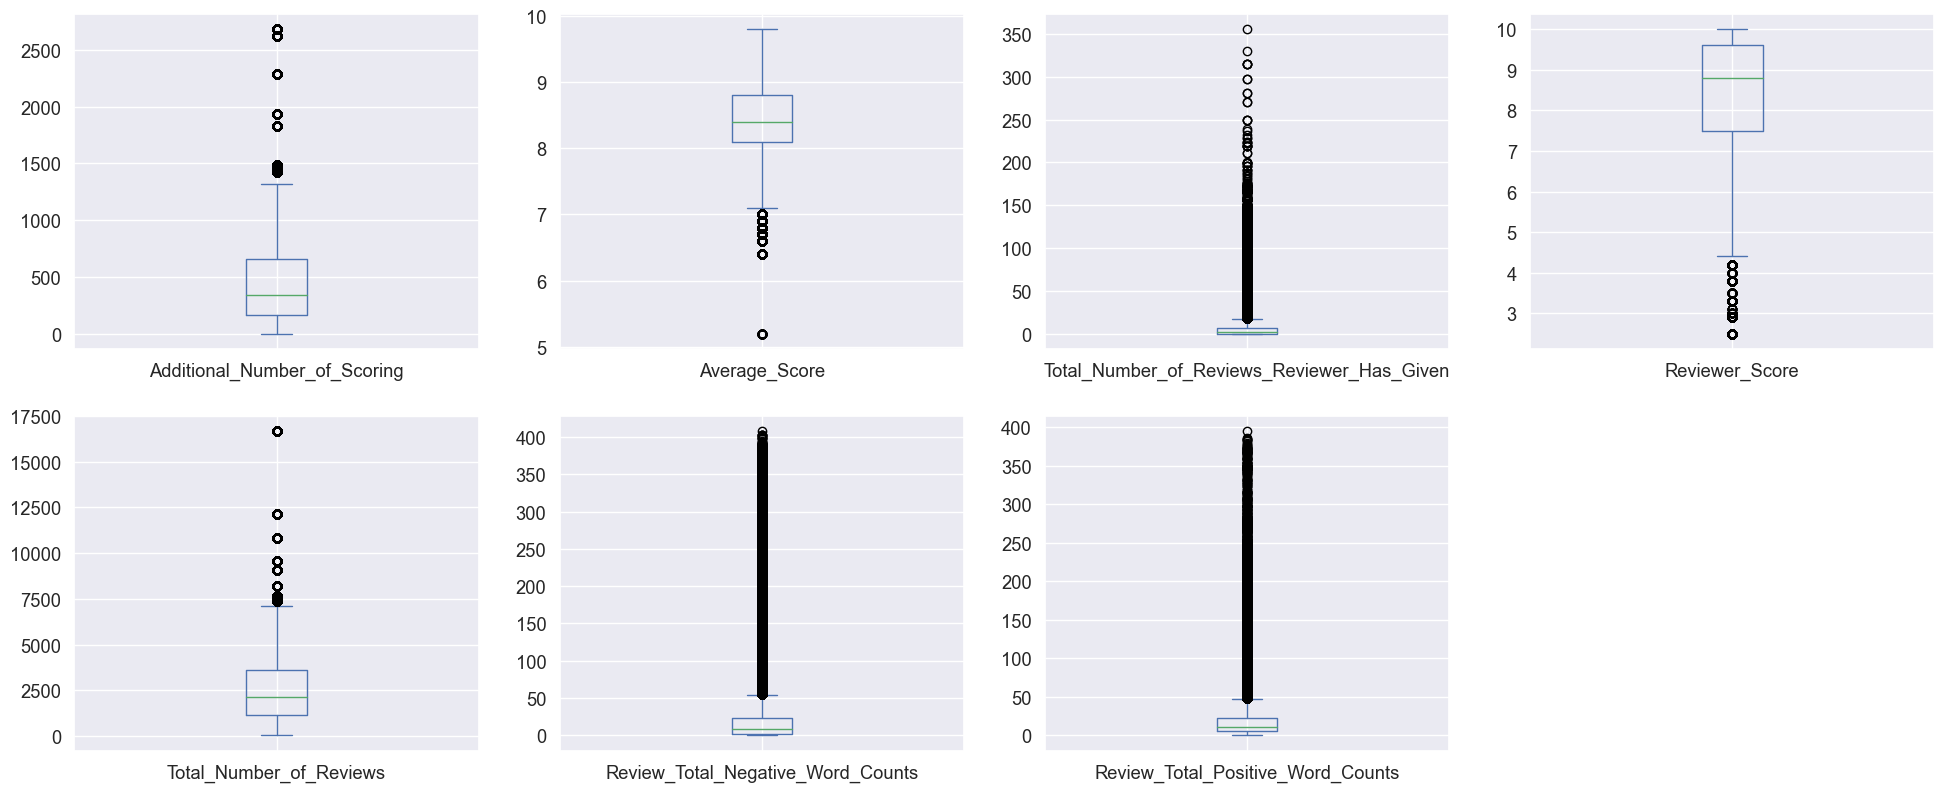

In [13]:
df[['Additional_Number_of_Scoring','Average_Score',
    'Total_Number_of_Reviews_Reviewer_Has_Given','Reviewer_Score','Total_Number_of_Reviews','Review_Total_Negative_Word_Counts','Review_Total_Positive_Word_Counts']].plot(kind = "box" , subplots = True , figsize = (24,20) ,  layout = (4,4))
plt.show()

# explore correlation between numeric columns

<AxesSubplot:>

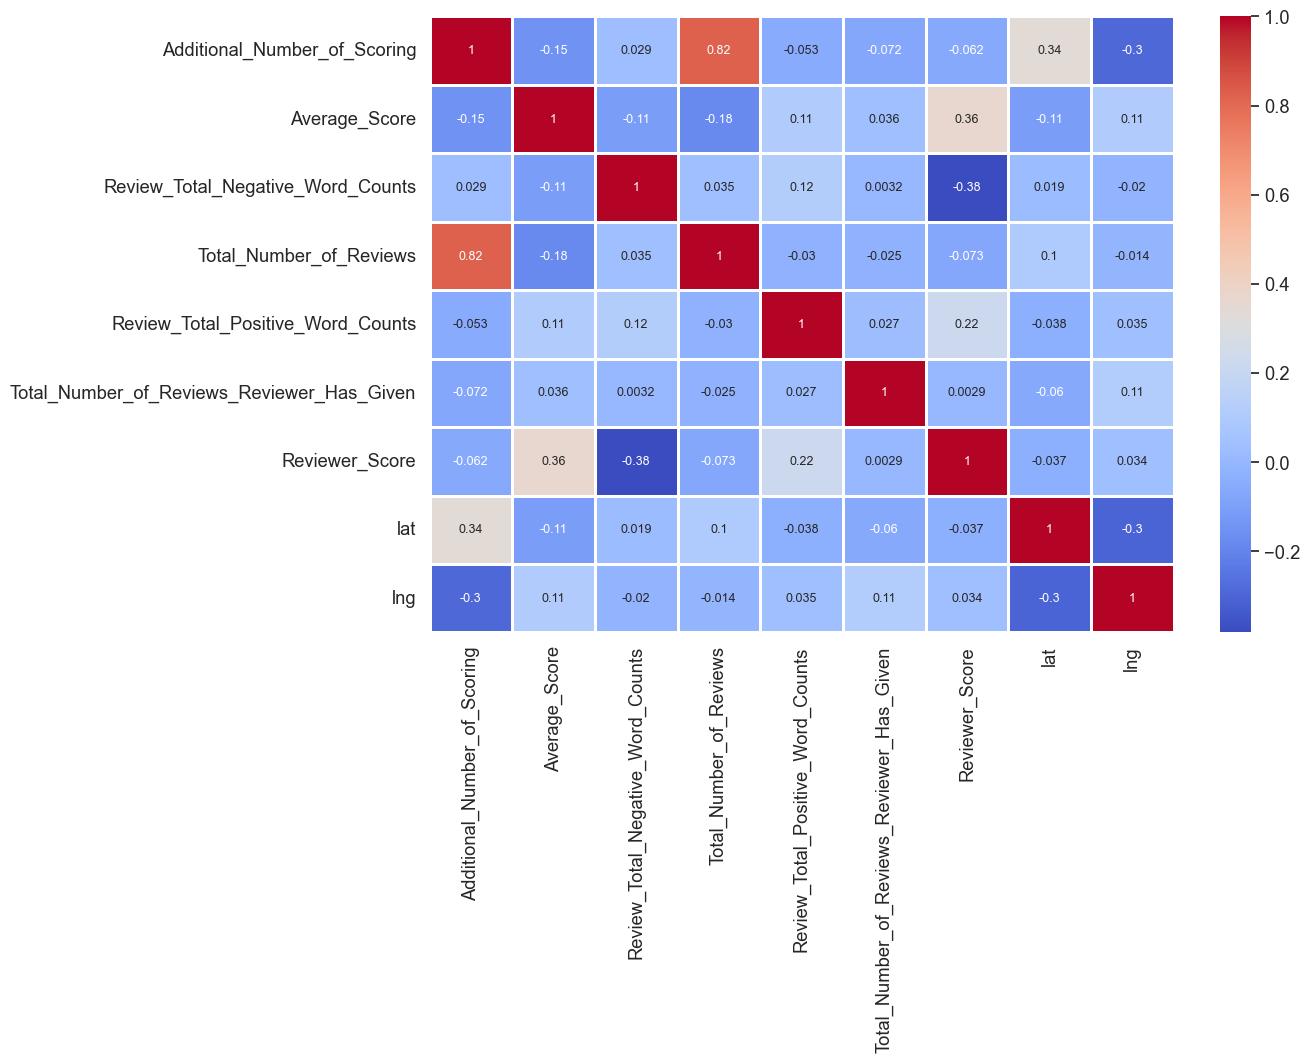

In [14]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),cmap = 'coolwarm',linewidth = 1,annot= True, annot_kws={"size": 9})

# Observation after data exploring
<h2>Data Preprocessing</h2>
<h3> Feature Transformations </h3>
- About "days_since_review"column we will delete it because isn't indicated for anything,it's mean count of days since write review till extract data.
<h4> Duplicated data </h4>
- we will delete duplicate values 526 records.
<h4> Missing data </h4>
- We have a 3268 missing values just in Latitude & Longitude and we will try to fill missing through Geocoder TimeOut & Nominatim libraries by Hotel Address column.
<h3> Feature Engineering and Extraction </h3>
<h6> we will create Country & Cities column through Hotel Address column </h6>
<h6>As for the tag column, we noticed a pattern in the data as if it is a to some benefits obtained by the reviewer or some of their requests, we will separate this column into 5 columns and find out how it will be after that.</h6>
<h6> we have more than 200 country in Reviewer_Nationality column so we will create regions column for decrease them </h6>
<h6>About "review _date" we will need to separate date to clolmuns month and year and day that'll help us to make some analysis.</h6>

# Feature Transformations

In [16]:
# Data Cleaning from duplicates and don't need some columns

In [17]:
df_copy = df.copy()

In [18]:
df_copy.head(1)

,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,days_since_review,lat,lng
0,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Russia,I am so angry that i made this post available...,397,1403,Only the park outside of the hotel was beauti...,11,7,2.9,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968


In [19]:
# let's drop days_since_review and lat&lng

In [20]:
df_copy.drop(['days_since_review','lat','lng','Additional_Number_of_Scoring'],axis=1,inplace=True)

In [21]:
# let's drop duplicated values

In [22]:
df_copy.duplicated().sum()

526

In [23]:
# ignore_index >> reset after dropping
df_copy.drop_duplicates(inplace=True,ignore_index=True)

In [24]:
df_copy.duplicated().sum()

0

In [25]:
df_copy.shape

(515212, 13)

In [26]:
df_copy.isnull().sum()

Hotel_Address                                 0
Review_Date                                   0
Average_Score                                 0
Hotel_Name                                    0
Reviewer_Nationality                          0
Negative_Review                               0
Review_Total_Negative_Word_Counts             0
Total_Number_of_Reviews                       0
Positive_Review                               0
Review_Total_Positive_Word_Counts             0
Total_Number_of_Reviews_Reviewer_Has_Given    0
Reviewer_Score                                0
Tags                                          0
dtype: int64

# Univariate Analysis

In [27]:
df_copy.head(1)

,Hotel_Address,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags
0,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,8/3/2017,7.7,Hotel Arena,Russia,I am so angry that i made this post available...,397,1403,Only the park outside of the hotel was beauti...,11,7,2.9,"[' Leisure trip ', ' Couple ', ' Duplex Double..."


# Review_Date

In [28]:
df_copy.Review_Date = pd.to_datetime(df_copy.Review_Date)

# hotel_name


In [29]:
df_copy.Hotel_Name.nunique()

1492

In [30]:
df_copy.Hotel_Name.value_counts()[:10]

Britannia International Hotel Canary Wharf           4789
Strand Palace Hotel                                  4256
Park Plaza Westminster Bridge London                 4169
Copthorne Tara Hotel London Kensington               3577
DoubleTree by Hilton Hotel London Tower of London    3212
Grand Royale London Hyde Park                        2958
Holiday Inn London Kensington                        2768
Hilton London Metropole                              2628
Millennium Gloucester Hotel London                   2565
Intercontinental London The O2                       2551
Name: Hotel_Name, dtype: int64

# Reviewer_Nationality

In [31]:
df_copy.Reviewer_Nationality.value_counts()[:10]

 United Kingdom               245110
 United States of America      35349
 Australia                     21648
 Ireland                       14814
 United Arab Emirates          10229
 Saudi Arabia                   8940
 Netherlands                    8757
 Switzerland                    8669
 Germany                        7929
 Canada                         7883
Name: Reviewer_Nationality, dtype: int64

# Total_Number_of_Reviews

In [32]:
df_copy.Total_Number_of_Reviews.describe()

count    515212.000000
mean       2744.698889
std        2318.090821
min          43.000000
25%        1161.000000
50%        2134.000000
75%        3633.000000
max       16670.000000
Name: Total_Number_of_Reviews, dtype: float64

<AxesSubplot:xlabel='Total_Number_of_Reviews'>

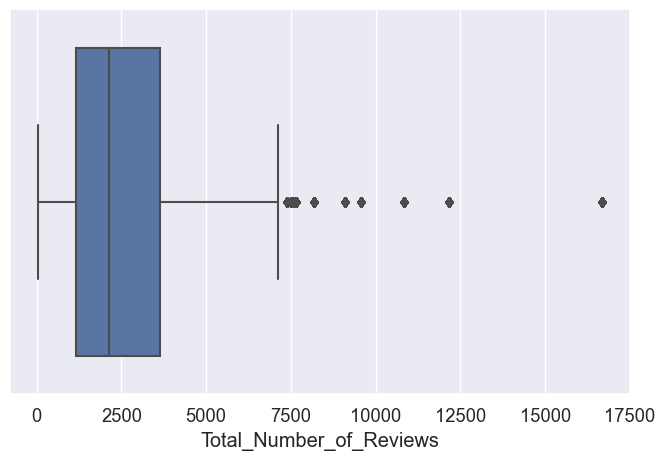

In [33]:
sns.boxplot(data=df_copy,x='Total_Number_of_Reviews',orient='h')

# Review_Total_Negative_Word_Counts

<AxesSubplot:xlabel='Review_Total_Negative_Word_Counts'>

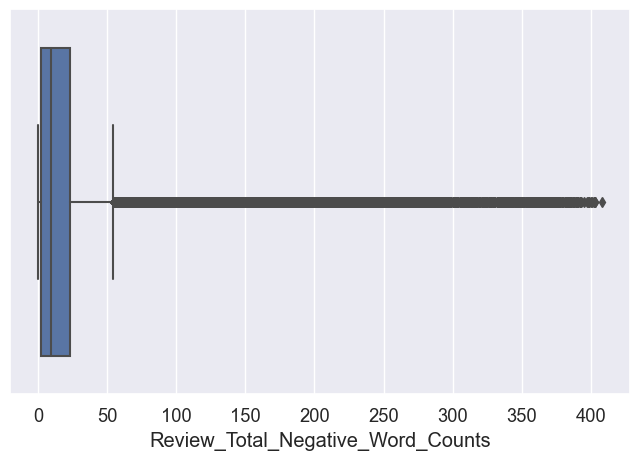

In [34]:
sns.boxplot(data=df_copy,x='Review_Total_Negative_Word_Counts',orient='h')

# Review_Total_Positive_Word_Counts

<AxesSubplot:xlabel='Review_Total_Positive_Word_Counts'>

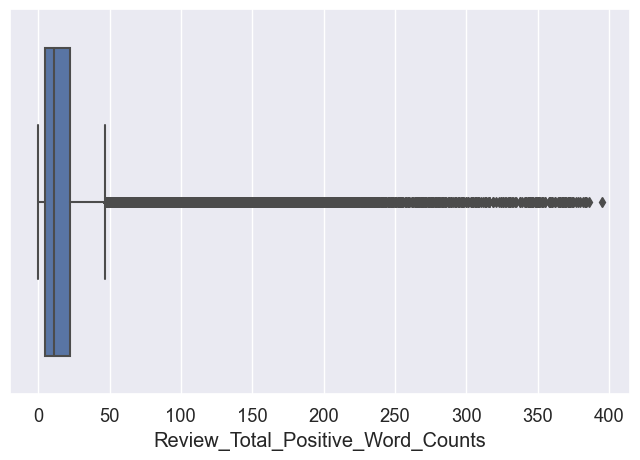

In [35]:
sns.boxplot(data=df_copy,x='Review_Total_Positive_Word_Counts',orient='h')

In [36]:
df_copy.head(1)

,Hotel_Address,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags
0,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,2017-08-03,7.7,Hotel Arena,Russia,I am so angry that i made this post available...,397,1403,Only the park outside of the hotel was beauti...,11,7,2.9,"[' Leisure trip ', ' Couple ', ' Duplex Double..."


# Reviewer_Score

In [37]:
df_copy.Reviewer_Score.describe()

count    515212.000000
mean          8.395532
std           1.637467
min           2.500000
25%           7.500000
50%           8.800000
75%           9.600000
max          10.000000
Name: Reviewer_Score, dtype: float64

<AxesSubplot:xlabel='Reviewer_Score'>

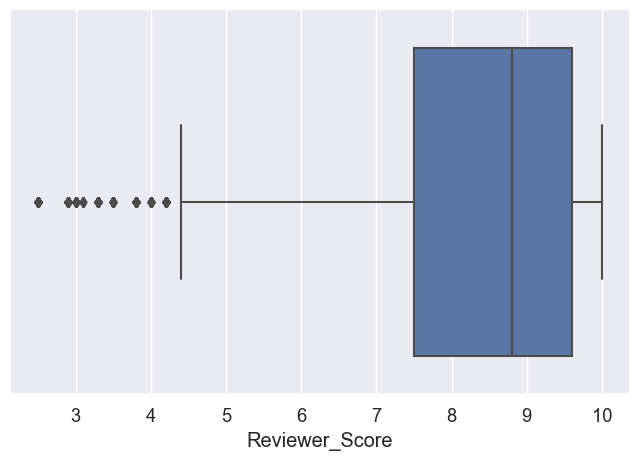

In [38]:
sns.boxplot(data=df_copy,x='Reviewer_Score',orient='h')

# Total_Number_of_Reviews_Reviewer_Has_Given

In [39]:
df_copy.Total_Number_of_Reviews_Reviewer_Has_Given.value_counts()

1      154506
2       67011
3       46802
4       34991
5       27604
        ...  
137         1
135         1
181         1
186         1
164         1
Name: Total_Number_of_Reviews_Reviewer_Has_Given, Length: 198, dtype: int64

<AxesSubplot:xlabel='Total_Number_of_Reviews_Reviewer_Has_Given'>

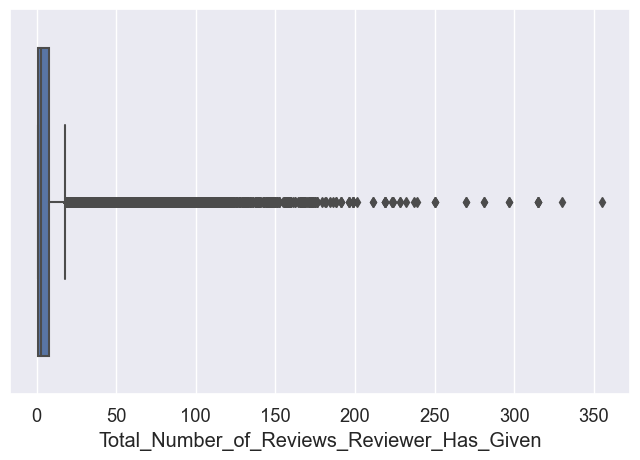

In [40]:
sns.boxplot(data=df_copy,x='Total_Number_of_Reviews_Reviewer_Has_Given')

# NLP for Positive_review and Negative_review

In [41]:
# clean reviews
# lower text
# remove stop words
# apply lemmatizaion 

In [42]:
df_copy.Positive_Review.value_counts()[:35]

No Positive             35904
 Location                9207
 Everything              2284
 location                1674
 Nothing                 1241
 The location            1122
 Great location          1045
 Good location            927
 Location                 915
 Everything               613
 Breakfast                608
 Friendly staff           514
 Staff                    453
 Excellent location       392
 Great location           372
 Location and staff       333
 everything               319
 Good location            275
 Nothing                  224
 Comfy bed                221
 nothing                  217
 The location             214
 good location            206
 The staff                197
 Good breakfast           189
                          182
 Location staff           180
 the location             180
 Location was great       178
 Location was good        178
 Every thing              172
 All                      172
 Perfect location         165
 Clean    

In [43]:
df_copy.Negative_Review.value_counts()[:35]

No Negative                  127757
 Nothing                      14288
 Nothing                       4233
 nothing                       2220
 N A                           1036
 None                           984
                                849
 N a                            509
 Breakfast                      407
 Small room                     372
 Location                       367
 Everything                     325
 All good                       318
 Nothing really                 315
 none                           301
 nothing                        283
 No complaints                  274
 Price                          260
 Nothing really                 254
 Nil                            247
 n a                            227
 Nothing at all                 221
 Nothing to dislike             209
 Nothing at all                 194
 Small rooms                    188
 None                           182
 No complaints                  176
 All good                   

In [44]:
stop_words = set(stopwords.words('english'))
wordnet_lemmatizer = WordNetLemmatizer()

In [45]:
#NLP for Negative Reviews
negative_comment = []

for comment in df_copy['Negative_Review']:
    only_letters = re.sub("[^a-zA-Z]", " ",comment) # bishel ay arkam w ay 3lamat 
    tokens = word_tokenize(only_letters) # bi2sm kol klma w 7ythom klhom fe list  
    lower_case = [l.lower() for l in tokens] # birg3 klam kolo 7arf small
    filtered_result = list(filter(lambda l: l not in stop_words, lower_case)) # lw klam dh msh mwogd fe stopwords eli hia 7rof elgar rag3ha
    lemmas = [wordnet_lemmatizer.lemmatize(t) for t in filtered_result] # birg3 klma laslha lw fe elmady birg3ha llmodar3 
    negative_comment.append(' '.join(lemmas))

In [46]:
df_copy['negative_review'] = negative_comment

In [47]:
#NLP for Positive Reviews
positive_comment = []

for comment in df_copy['Positive_Review']:
    only_letters2 = re.sub("[^a-zA-Z]", " ",comment)
    tokens2 = word_tokenize(only_letters2)
    lower_case2 = [l.lower() for l in tokens2]
    filtered_result2 = list(filter(lambda l: l not in stop_words, lower_case2))
    lemmas2 = [wordnet_lemmatizer.lemmatize(t) for t in filtered_result2] 
    positive_comment.append(' '.join(lemmas2))

In [48]:
df_copy['positive'] = positive_comment

In [49]:
all_neg_words=df_copy['negative_review'].values
all_pos_words=df_copy["positive"].values

In [50]:
# unigram
# displaying the frequency of words in positive and negative reviews 
freq_pos = Counter(all_pos_words)
freq_neg = Counter(all_neg_words)
print('Most common positive words : ',freq_pos.most_common(50))
print("*"*150)
print(" "*150)
print('Most common negative words : ',freq_neg.most_common(50))

Most common positive words :  [('positive', 35905), ('location', 14097), ('everything', 3373), ('nothing', 1810), ('good location', 1736), ('great location', 1721), ('location good', 1195), ('breakfast', 1077), ('location staff', 1067), ('friendly staff', 1024), ('location great', 939), ('staff', 871), ('bed comfortable', 777), ('location excellent', 699), ('', 695), ('staff friendly', 684), ('staff friendly helpful', 669), ('excellent location', 652), ('bed comfy', 650), ('staff helpful', 619), ('breakfast good', 581), ('location perfect', 578), ('comfy bed', 509), ('friendly helpful staff', 491), ('everything perfect', 483), ('clean', 466), ('comfortable bed', 448), ('good', 428), ('good breakfast', 413), ('location breakfast', 398), ('location location location', 362), ('location friendly staff', 354), ('staff location', 352), ('helpful staff', 331), ('room', 331), ('great location friendly staff', 328), ('staff excellent', 327), ('bed', 309), ('perfect location', 295), ('location h

In [51]:
# bigram
# two words appear toghter
garms_positive=ngrams(all_pos_words,2)
garms_negative=ngrams(all_neg_words,2)

In [52]:
freq_pos_garms_positive = Counter(garms_positive)
freq_neg_garms_negative = Counter(garms_negative)
print('Most Common Two words Positive  : ',freq_pos_garms_positive.most_common(50))
print("*"*150)
print(" "*150)
print('Most Common Two words negative  : ',freq_neg_garms_negative.most_common(50))

Most Common Two words Positive  :  [(('positive', 'positive'), 3284), (('positive', 'location'), 1309), (('location', 'positive'), 1226), (('location', 'location'), 744), (('positive', 'everything'), 295), (('everything', 'positive'), 279), (('nothing', 'positive'), 192), (('positive', 'nothing'), 190), (('good location', 'positive'), 175), (('positive', 'great location'), 167), (('great location', 'positive'), 152), (('positive', 'good location'), 147), (('breakfast', 'positive'), 110), (('positive', 'location good'), 107), (('location staff', 'positive'), 105), (('location', 'everything'), 104), (('location good', 'positive'), 100), (('friendly staff', 'positive'), 98), (('positive', 'friendly staff'), 97), (('positive', 'breakfast'), 97), (('staff', 'positive'), 90), (('location', 'good location'), 89), (('everything', 'location'), 87), (('location', 'great location'), 87), (('positive', 'location staff'), 85), (('positive', 'location great'), 83), (('great location', 'location'), 8

In [53]:
from sklearn.feature_extraction.text import CountVectorizer

In [54]:
#Finding most important words in Negative Reviews 
cv = CountVectorizer(analyzer = 'word',stop_words = 'english',max_features = 50,ngram_range=(4,4))
most_negative_words = cv.fit_transform(all_neg_words)
neg_counts = most_negative_words.sum(axis=0)
neg_counts = cv.vocabulary_
print('the most important words in Negative Reviews:')
print('--------------------------------------------')
print(neg_counts)

the most important words in Negative Reviews:
--------------------------------------------
{'tea coffee facility room': 47, 'room king size bed': 34, 'room little bit small': 35, 'double bed single bed': 18, 'room small bathroom small': 37, 'small room small bathroom': 45, 'breakfast included room price': 12, 'tea coffee making facility': 48, 'breakfast included room rate': 13, 'bed single bed pushed': 7, 'air conditioning room work': 0, 'room small double bed': 40, 'room small bathroom tiny': 38, 'double room single bed': 20, 'room single bed pushed': 36, 'room hot air conditioning': 33, 'air conditioning working properly': 3, 'breakfast included price room': 11, 'air conditioning working room': 4, 'air conditioning work room': 2, 'location little bit far': 30, 'coffee making facility room': 14, 'feel like star hotel': 23, 'coffee tea making facility': 16, 'tea making facility room': 49, 'open window fresh air': 32, 'iron ironing board room': 25, 'room small bed small': 39, 'small roo

In [55]:
negative_words=pd.DataFrame()
negative_words["negative_sentence"]=neg_counts.keys()
negative_words["frequency"]=neg_counts.values()

In [56]:
negative_frequent = negative_words.sort_values(by="frequency",ascending=False)
negative_frequent.head()

,negative_sentence,frequency
24,tea making facility room,49
7,tea coffee making facility,48
0,tea coffee facility room,47
28,small room small bed,46
5,small room small bathroom,45


In [57]:
df_copy.head(2)

,Hotel_Address,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,negative_review,positive
0,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,2017-08-03,7.7,Hotel Arena,Russia,I am so angry that i made this post available...,397,1403,Only the park outside of the hotel was beauti...,11,7,2.9,"[' Leisure trip ', ' Couple ', ' Duplex Double...",angry made post available via possible site us...,park outside hotel beautiful
1,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,2017-08-03,7.7,Hotel Arena,Ireland,No Negative,0,1403,No real complaints the hotel was great great ...,105,7,7.5,"[' Leisure trip ', ' Couple ', ' Duplex Double...",negative,real complaint hotel great great location surr...


<AxesSubplot:xlabel='frequency', ylabel='negative_sentence'>

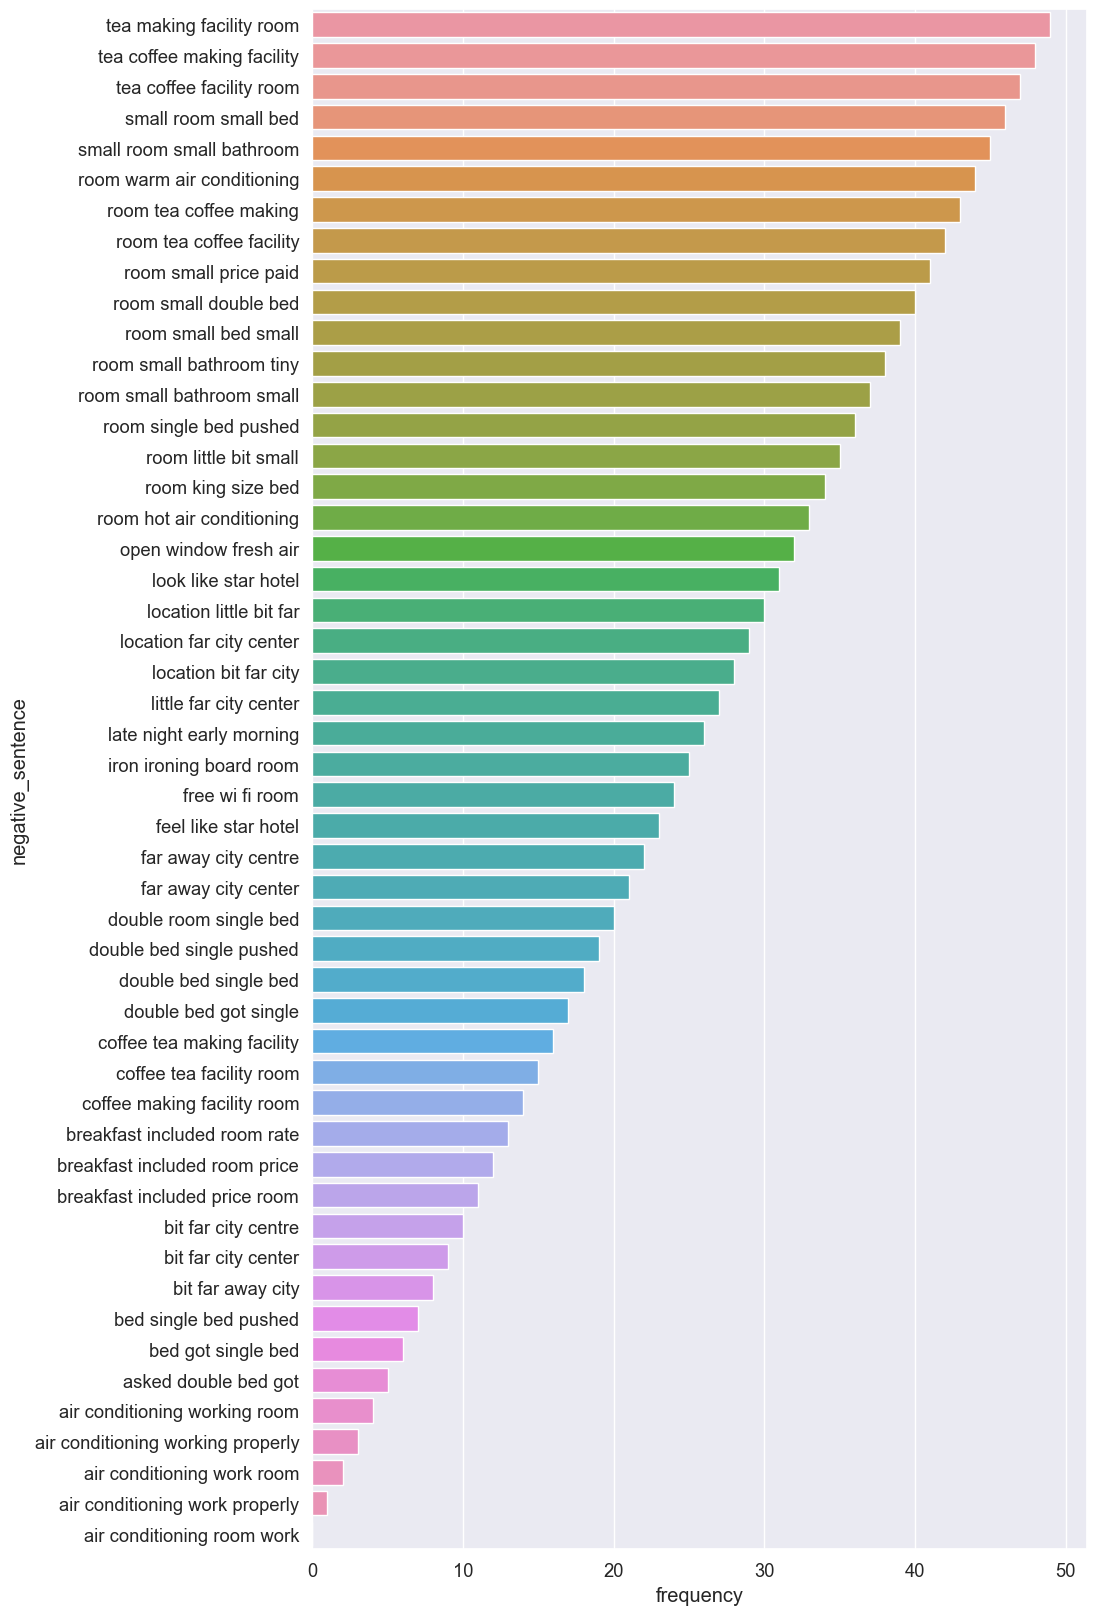

In [58]:
plt.figure(figsize=(10,20))
sns.barplot(x='frequency',y='negative_sentence',data=negative_frequent)

In [59]:
# observation 
# Coffe and Tea are important in room
# it seems the Rooms are small (bed and bathroom too)
# it seems there is problem in air conditioning (doesn't work - noisy)
# hotel Location far of city center
# it seems there is problem in ironing boared room
# it seems there is problem in breakfast price
# room hotel full booked

In [60]:
cv = CountVectorizer(analyzer = 'word',stop_words = 'english',max_features = 50,ngram_range=(4,4))
most_positive_words = cv.fit_transform(all_pos_words)
pos_counts = most_positive_words.sum(axis=0)
pos_counts = cv.vocabulary_
print('the most important words in Positive Reviews:')
print('--------------------------------------------')
print(pos_counts)

the most important words in Positive Reviews:
--------------------------------------------
{'hotel friendly helpful staff': 29, 'staff friendly helpful room': 43, 'bed comfortable room clean': 0, 'friendly staff great location': 16, 'staff friendly helpful location': 42, 'earl court tube station': 5, 'friendly staff good location': 15, 'excellent staff friendly helpful': 7, 'great location friendly staff': 19, 'room clean bed comfortable': 36, 'great location walking distance': 24, 'clean staff friendly helpful': 3, 'staff friendly helpful breakfast': 40, 'friendly staff good breakfast': 14, 'staff friendly room clean': 44, 'tea coffee making facility': 49, 'great location friendly helpful': 18, 'location friendly helpful staff': 32, 'friendly helpful staff good': 10, 'helpful staff good breakfast': 26, 'good location friendly staff': 17, 'helpful staff great location': 28, 'hotel staff friendly helpful': 30, 'great location great staff': 20, 'great staff friendly helpful': 25, 'friend

In [61]:
positive_words=pd.DataFrame()
positive_words["positive_sentence"]=pos_counts.keys()
positive_words["frequency"]=pos_counts.values()

In [62]:
postitve_frequent = positive_words.sort_values(by="frequency",ascending=False)

<AxesSubplot:xlabel='frequency', ylabel='positive_sentence'>

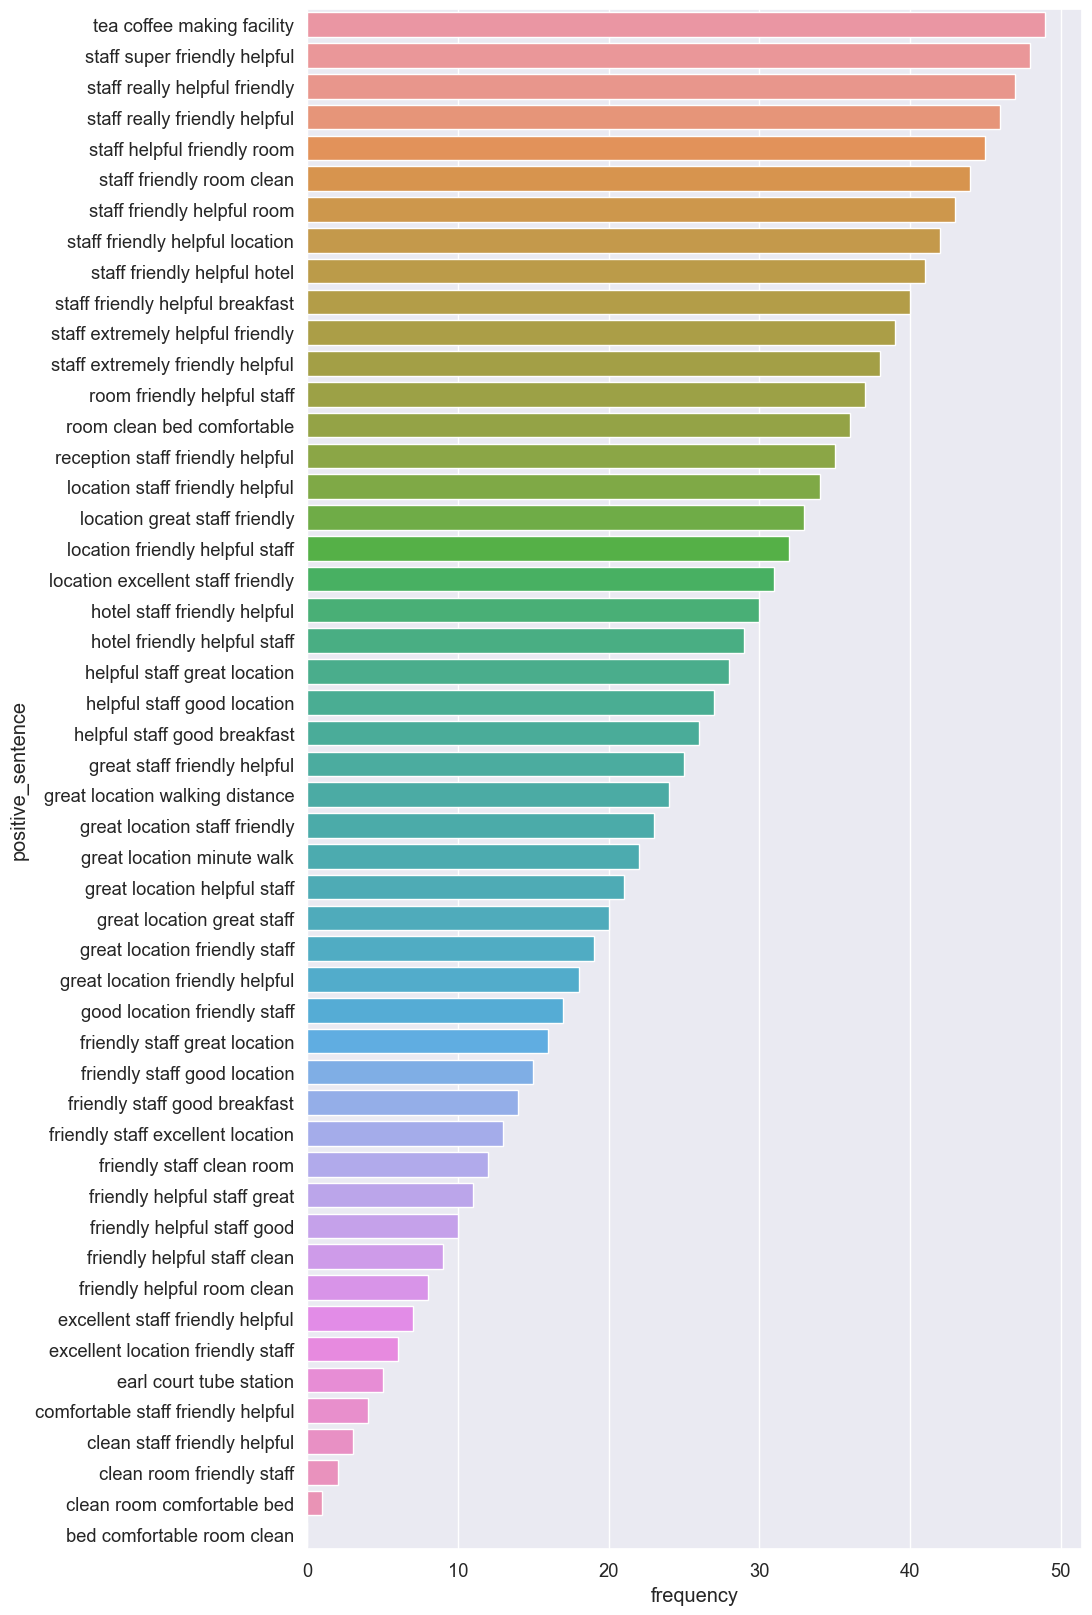

In [63]:
plt.figure(figsize=(10,20))
sns.barplot(x='frequency',y='positive_sentence',data=postitve_frequent)

In [64]:
# observations:
# Staff helpful and friendly
# it seems the Rooms clean
# it seems the beds are comfortable
# some of hotel Location are great - good

In [ ]:
# Don't need this column any more 

In [65]:
df_copy.drop(['Negative_Review','Review_Total_Negative_Word_Counts','Positive_Review','Review_Total_Positive_Word_Counts'],axis=1,inplace=True)